### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
% matplotlib inline

pd.options.display.max_rows = 4000


/Users/swetha/anaconda3/lib/python3.5/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.shape

(12684, 26)

In [5]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

2. Investigate the dataset for missing or problematic data.

In [6]:
(data.isnull().sum()/data.shape[0])*100.0

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

Car attribute has more than 99% values missing. So we can drop the entire column. 
Other attributes like 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' have 1-2% missing values, which can be imputed. Since these are categorical variables, "mode" is a good choice of value to impute.

In [7]:
# Removing "car" column as it has 99% missing values
df = data.drop(['car'], axis=1)
df.shape

(12684, 25)

In [8]:
# Imputing remaining attributes with their modes
df['Bar'] = df['Bar'].fillna(df['Bar'].mode()[0])
df['CoffeeHouse'] = df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0])
df['CarryAway'] = df['CarryAway'].fillna(df['CarryAway'].mode()[0])
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0])
df['Restaurant20To50'] = df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0])

In [9]:
df['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [10]:
(df['Y'].value_counts()/df.shape[0]) *100.0

1    56.843267
0    43.156733
Name: Y, dtype: float64

56.8% of the total observations chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

/Users/swetha/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


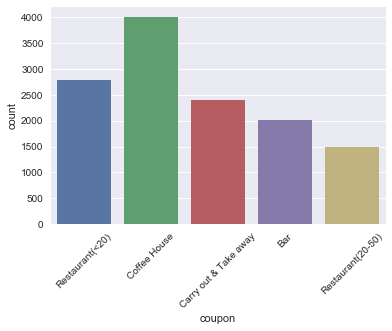

In [11]:
chart = sns.countplot(data=df, x='coupon')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


6. Use a histogram to visualize the temperature column.

(array([2316.,    0.,    0.,    0.,    0., 3840.,    0.,    0.,    0.,
        6528.]),
 array([30., 35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 <a list of 10 Patch objects>)

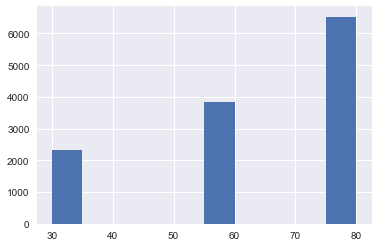

In [12]:
# Histogram to visualize temperature
plt.hist(df['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
df_bar = df[df['coupon']== 'Bar']

In [14]:
df_bar.shape

(2017, 25)

In [15]:
# Bar coupons acceptance
df_bar['Y'].value_counts()

0    1190
1     827
Name: Y, dtype: int64

2. What proportion of bar coupons were accepted?


In [16]:
# Of the total number of bar coupons, whar proportion was accepted?
print("Proportion of bar coupons accepted :", round(df_bar[df_bar['Y']==1]['Y'].count()/df_bar.shape[0]*100.0))

Proportion of bar coupons accepted : 41.0


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [17]:
# Who went to bar 3 or fewer times vs more
df_bar['Bar'].value_counts()

never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: Bar, dtype: int64

In [18]:
less_than_4 = ['never', 'less1', '1~3' ]
more_than_4 = ['4~8', 'gt8' ]

bar_visits_fewer = df_bar.query('Bar in @less_than_4')
bar_visits_fewer_acceptance = round((bar_visits_fewer[bar_visits_fewer['Y']==1]['Y'].count()/bar_visits_fewer.shape[0])*100.0)

bar_visits_more = df_bar.query('Bar in @more_than_4')
bar_visits_more_acceptance = round((bar_visits_more[bar_visits_more['Y']==1]['Y'].count()/bar_visits_more.shape[0])*100.0)

print("Coupon acceptance rate for people who went to bar 3 or fewer times: ", bar_visits_fewer_acceptance)
print("Coupon acceptance rate for people who went to bar 4 or more times: ", bar_visits_more_acceptance)


Coupon acceptance rate for people who went to bar 3 or fewer times:  37.0
Coupon acceptance rate for people who went to bar 4 or more times:  77.0


People who visit bar 4 or more times have a higher coupon acceptance rate than people who visit bar 3 or fewer times 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [19]:
# convert age to numeric column#$pd.to_numeric
df['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [20]:
age_over_25 = ['26', '31', '36', '41', '46','50plus']
more_than_1_visit = ['1~3', '4~8', 'gt8']

print(" Acceptance rate for drivers who go to a bar more than once a month and over age 25: ",
      df_bar.query('age in @age_over_25 & Bar in @more_than_1_visit')['Y'].mean()*100.0)
print(" Acceptance rate for drivers who go to a bar more than once a month and under age 25: ",
      df_bar.query('age not in @age_over_25 & Bar in @more_than_1_visit')['Y'].mean()*100.0)

 Acceptance rate for drivers who go to a bar more than once a month and over age 25:  69.52380952380952
 Acceptance rate for drivers who go to a bar more than once a month and under age 25:  67.04545454545455


Acceptance rates are similar for age groups over and under 25

In [21]:
df_bar.groupby('age')['Y'].mean()*100.0

age
21         50.599520
26         48.860759
31         36.873156
36         30.143541
41         43.258427
46         34.862385
50plus     29.681979
below21    41.379310
Name: Y, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [22]:
df_bar['occupation'].value_counts()

Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Personal Care & Service                       27
Architecture & Engineering                    27
Life Physical Social Science                  24
Construction & Extra

In [23]:
df_bar['passanger'].value_counts()

Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: passanger, dtype: int64

In [24]:
df_bar.groupby('passanger')['Y'].mean()*100.0

passanger
Alone        40.750000
Friend(s)    55.786350
Kid(s)       20.873786
Partner      39.051095
Name: Y, dtype: float64

In [25]:
df_bar.query('passanger not in ("Kid(s)") & Bar in @more_than_1_visit & occupation != "Farming Fishing & Forestry"')['Y'].mean()*100.0

71.32486388384754

In [26]:
df_bar.query('passanger in ("Kid(s)") & Bar in @more_than_1_visit & occupation != "Farming Fishing & Forestry"')['Y'].mean()*100.0

37.77777777777778

Passengers who ride with kids have a lower acceptance rate for coupon than those riding alone or with friends or partner.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [27]:
df_bar['maritalStatus'].value_counts()

Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64

In [28]:
df_bar['RestaurantLessThan20'].value_counts()

1~3      901
4~8      568
less1    325
gt8      186
never     37
Name: RestaurantLessThan20, dtype: int64

In [29]:
df_bar.groupby('RestaurantLessThan20')['Y'].mean()*100.0

RestaurantLessThan20
1~3      39.955605
4~8      42.605634
gt8      45.698925
less1    37.538462
never    48.648649
Name: Y, dtype: float64

In [30]:
df_bar['income'].value_counts()

$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: income, dtype: int64

In [31]:
df_bar.groupby('income')['Y'].mean()*100.0

income
$100000 or More     47.422680
$12500 - $24999     41.666667
$25000 - $37499     44.968553
$37500 - $49999     34.831461
$50000 - $62499     41.221374
$62500 - $74999     35.384615
$75000 - $87499     37.748344
$87500 - $99999     31.724138
Less than $12500    46.060606
Name: Y, dtype: float64

In [32]:
df_bar.groupby('occupation')['Y'].mean()*100.0

occupation
Architecture & Engineering                   66.666667
Arts Design Entertainment Sports & Media     33.000000
Building & Grounds Cleaning & Maintenance    28.571429
Business & Financial                         46.067416
Community & Social Services                  29.545455
Computer & Mathematical                      37.500000
Construction & Extraction                    54.166667
Education&Training&Library                   28.571429
Farming Fishing & Forestry                   44.444444
Food Preparation & Serving Related           47.916667
Healthcare Practitioners & Technical         43.902439
Healthcare Support                           65.909091
Installation Maintenance & Repair            44.444444
Legal                                        35.294118
Life Physical Social Science                 62.500000
Management                                   54.621849
Office & Administrative Support              50.476190
Personal Care & Service                      37.037037

In [33]:
age_under_30 = ['21', '26', 'below21']
more_than_4 = ['4~8', 'gt8']
inc_less_than_50K = ['$25000 - $37499', '$12500 - $24999','$37500 - $49999']

q6_1= df_bar.query('Bar in @more_than_1_visit & passanger not in ("Kid(s)") & maritalStatus != "Widowed"')['Y'].mean()*100.0
q6_2= df_bar.query('Bar in @more_than_1_visit & age in @age_under_30')['Y'].mean()*100.0
q6_3= df_bar.query('RestaurantLessThan20 in @more_than_4 & income in @inc_less_than_50K')['Y'].mean()*100.0

print("Coupon Acceptance rate for : ")
print("Go to bars more than once a month, had passengers that were not a kid, and were not widowed", q6_1)
print("Go to bars more than once a month and are under the age of 30", q6_2)
print("Go to cheap restaurants more than 4 times a month and income is less than 50K", q6_3)


Coupon Acceptance rate for : 
Go to bars more than once a month, had passengers that were not a kid, and were not widowed 71.32486388384754
Go to bars more than once a month and are under the age of 30 72.17391304347827
Go to cheap restaurants more than 4 times a month and income is less than 50K 45.75645756457565


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who accepted bar coupons typically are: <br>
1.  People who went to bars 3 or more times a month <br>
2.  People who drive with friends or partner or alone <br>
3.  Below 30 age group <br>

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [34]:
df['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

# Investigating Coffee House Coupons

In [35]:
coffee = df[df['coupon'] == 'Coffee House']
coffee.shape

(3996, 25)

In [36]:
# Acceptance rate for coffee house coupons
coffee['Y'].value_counts()

0    2001
1    1995
Name: Y, dtype: int64

In [37]:
print("Proportion accepting coffee house coupons: ", coffee['Y'].mean()*100.0)

Proportion accepting coffee house coupons:  49.92492492492492


### How do user attributes affect coupon acceptance rate?

In [38]:
# Exploring acceptance rates of some of the categorical features
user_features = ['gender', 'age','maritalStatus','education','occupation', 'income',  'CoffeeHouse', 'has_children' ]
for f in features:
    print("\n", df_bar.groupby(f)['Y'].mean().sort_values(ascending=False)*100.0)

NameError: name 'features' is not defined

### How do contextual attributes affect coupon acceptance rate?

In [ ]:
contextual_features = ['destination', 'weather','time','temperature','passanger']
for f in contextual_features:
    print("\n", df_bar.groupby(f)['Y'].mean().sort_values(ascending=False)*100.0)